## DEVELOPMENT

# 0.0 LIBRARIES IMPORT

In [15]:
import os
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.max_colwidth = None
pd.set_option("display.float_format", lambda x: '%.2f' % x)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
pwd

'C:\\Users\\WINNER\\Documents\\workspace folder 2\\appliances_energy_prediction'

# 1.0 DATA INGESTION

In [3]:
FILE_NAME = "energydata_complete.csv"
DATA_FOLDER = "data"

In [4]:
main_path = os.getcwd()
main_path

'C:\\Users\\WINNER\\Documents\\workspace folder 2\\appliances_energy_prediction'

In [5]:
file_path = os.path.join(os.path.join(main_path, DATA_FOLDER), FILE_NAME)

In [6]:
file_path

'C:\\Users\\WINNER\\Documents\\workspace folder 2\\appliances_energy_prediction\\data\\energydata_complete.csv'

In [7]:
%%time

energy_data = pd.read_csv(file_path)

CPU times: total: 266 ms
Wall time: 220 ms


# 1.1 DATA INSPECTION

In [9]:
energy_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
TARGET = "Appliances"

In [9]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [10]:
energy_data["date"] = pd.to_datetime(energy_data["date"])

In [11]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [12]:
energy_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.60,19.20,44.79,19.79,44.73,19.00,45.57,17.17,55.20,7.03,84.26,17.20,41.63,18.20,48.90,17.03,45.53,6.60,733.50,92.00,7.00,63.00,5.30,13.28,13.28
1,2016-01-11 17:10:00,60,30,19.89,46.69,19.20,44.72,19.79,44.79,19.00,45.99,17.17,55.20,6.83,84.06,17.20,41.56,18.20,48.86,17.07,45.56,6.48,733.60,92.00,6.67,59.17,5.20,18.61,18.61
2,2016-01-11 17:20:00,50,30,19.89,46.30,19.20,44.63,19.79,44.93,18.93,45.89,17.17,55.09,6.56,83.16,17.20,41.43,18.20,48.73,17.00,45.50,6.37,733.70,92.00,6.33,55.33,5.10,28.64,28.64
3,2016-01-11 17:30:00,50,40,19.89,46.07,19.20,44.59,19.79,45.00,18.89,45.72,17.17,55.09,6.43,83.42,17.13,41.29,18.10,48.59,17.00,45.40,6.25,733.80,92.00,6.00,51.50,5.00,45.41,45.41
4,2016-01-11 17:40:00,60,40,19.89,46.33,19.20,44.53,19.79,45.00,18.89,45.53,17.20,55.09,6.37,84.89,17.20,41.23,18.10,48.59,17.00,45.40,6.13,733.90,92.00,5.67,47.67,4.90,10.08,10.08


# 2.0 Exploratory Data Analysis 

In [13]:
energy_data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00,19735.00
mean,97.69,3.80,21.69,40.26,20.34,40.42,22.27,39.24,20.86,39.03,19.59,50.95,7.91,54.61,20.27,35.39,22.03,42.94,19.49,41.55,7.41,755.52,79.75,4.04,38.33,3.76,24.99,24.99
std,102.52,7.94,1.61,3.98,2.19,4.07,2.01,3.25,2.04,4.34,1.84,9.02,6.09,31.15,2.11,5.11,1.96,5.22,2.01,4.15,5.32,7.40,14.90,2.45,11.79,4.19,14.50,14.50
min,10.00,0.00,16.79,27.02,16.10,20.46,17.20,28.77,15.10,27.66,15.33,29.82,-6.07,1.00,15.39,23.20,16.31,29.60,14.89,29.17,-5.00,729.30,24.00,0.00,1.00,-6.60,0.01,0.01
25%,50.00,0.00,20.76,37.33,18.79,37.90,20.79,36.90,19.53,35.53,18.28,45.40,3.63,30.02,18.70,31.50,20.79,39.07,18.00,38.50,3.67,750.93,70.33,2.00,29.00,0.90,12.50,12.50
50%,60.00,0.00,21.60,39.66,20.00,40.50,22.10,38.53,20.67,38.40,19.39,49.09,7.30,55.29,20.03,34.86,22.10,42.38,19.39,40.90,6.92,756.10,83.67,3.67,40.00,3.43,24.90,24.90
75%,100.00,0.00,22.60,43.07,21.50,43.26,23.29,41.76,22.10,42.16,20.62,53.66,11.26,83.23,21.60,39.00,23.39,46.54,20.60,44.34,10.41,760.93,91.67,5.50,40.00,6.57,37.58,37.58
max,1080.00,70.00,26.26,63.36,29.86,56.03,29.24,50.16,26.20,51.09,25.80,96.32,28.29,99.90,26.00,51.40,27.23,58.78,24.50,53.33,26.10,772.30,100.00,14.00,66.00,15.50,50.00,50.00


# Appliances energy plot

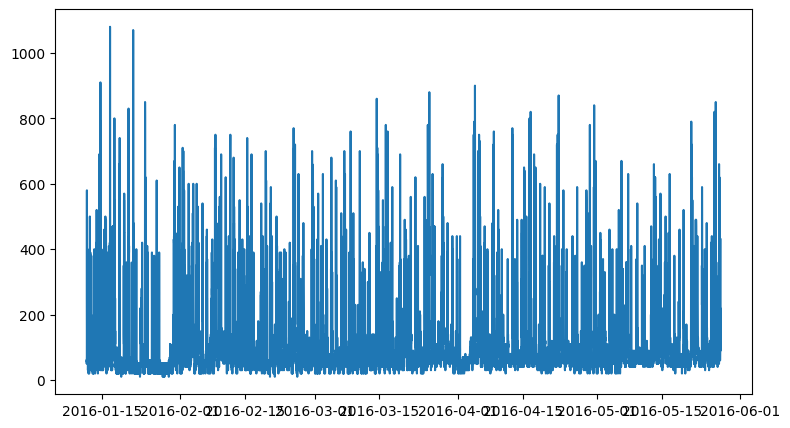

In [19]:
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(energy_data["date"], energy_data["Appliances"])
plt.savefig("Images/appliance energy plot.png")

# Lights energy plot 

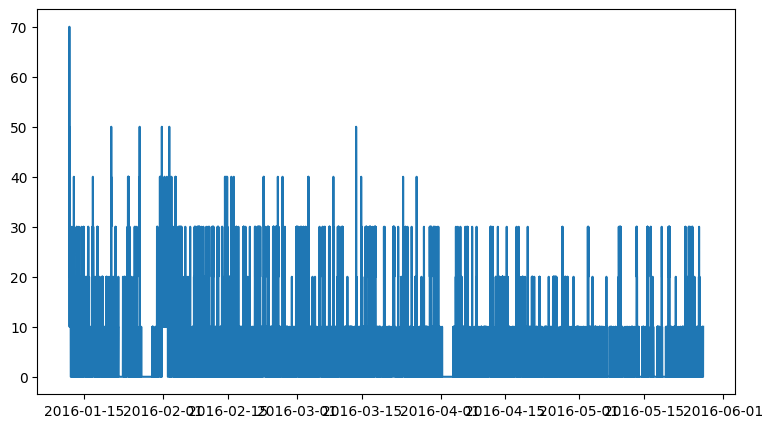

In [20]:
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(energy_data["date"], energy_data["lights"])
plt.savefig("Images/lights energy plot.png")

In [ ]:
# Categorical

In [21]:
energy_data["lights"].value_counts()  

0     15252
10     2212
20     1624
30      559
40       77
50        9
70        1
60        1
Name: lights, dtype: int64

# 3.0 Model Building

In [22]:
energy_data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [23]:
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset,TabularPredictor

In [24]:
energy_data.shape

(19735, 29)

In [25]:
train_data, test_data = train_test_split(energy_data, test_size=0.33, random_state=42)

In [26]:
train_data.shape, test_data.shape

((13222, 29), (6513, 29))

In [27]:
train_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
11553,2016-03-31 22:30:00,50,0,22.70,38.90,20.57,41.20,22.00,38.53,20.50,40.40,19.89,48.63,6.19,66.36,20.26,34.09,24.60,42.95,20.00,40.43,6.20,755.80,87.00,3.50,32.50,4.15,25.74,25.74
6580,2016-02-26 09:40:00,350,0,20.03,38.83,18.43,39.59,20.60,37.29,19.82,35.73,18.33,45.40,3.36,84.50,18.70,33.79,20.10,41.06,18.00,41.29,2.33,755.00,90.00,1.00,59.67,0.83,17.72,17.72
4130,2016-02-09 09:20:00,190,0,21.39,43.76,20.63,42.43,22.46,41.79,20.10,43.53,20.00,46.88,6.19,87.70,18.87,37.98,21.31,51.28,19.00,46.16,5.83,737.47,93.00,4.67,61.67,4.77,29.92,29.92
9812,2016-03-19 20:20:00,100,0,22.17,36.26,20.10,38.06,22.20,35.09,21.29,32.86,18.60,43.90,6.90,33.30,19.20,29.00,23.10,36.33,19.26,34.59,6.03,762.33,75.67,2.33,20.67,1.97,14.64,14.64
18178,2016-05-16 22:40:00,40,0,23.23,38.50,21.43,38.25,24.20,36.29,23.20,35.77,21.79,41.80,9.92,12.20,23.39,33.38,24.79,39.26,22.60,37.08,10.80,760.60,72.00,1.00,40.00,5.77,33.68,33.68


In [28]:
train_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
11553,2016-03-31 22:30:00,50,0,22.70,38.90,20.57,41.20,22.00,38.53,20.50,40.40,19.89,48.63,6.19,66.36,20.26,34.09,24.60,42.95,20.00,40.43,6.20,755.80,87.00,3.50,32.50,4.15,25.74,25.74
6580,2016-02-26 09:40:00,350,0,20.03,38.83,18.43,39.59,20.60,37.29,19.82,35.73,18.33,45.40,3.36,84.50,18.70,33.79,20.10,41.06,18.00,41.29,2.33,755.00,90.00,1.00,59.67,0.83,17.72,17.72
4130,2016-02-09 09:20:00,190,0,21.39,43.76,20.63,42.43,22.46,41.79,20.10,43.53,20.00,46.88,6.19,87.70,18.87,37.98,21.31,51.28,19.00,46.16,5.83,737.47,93.00,4.67,61.67,4.77,29.92,29.92
9812,2016-03-19 20:20:00,100,0,22.17,36.26,20.10,38.06,22.20,35.09,21.29,32.86,18.60,43.90,6.90,33.30,19.20,29.00,23.10,36.33,19.26,34.59,6.03,762.33,75.67,2.33,20.67,1.97,14.64,14.64
18178,2016-05-16 22:40:00,40,0,23.23,38.50,21.43,38.25,24.20,36.29,23.20,35.77,21.79,41.80,9.92,12.20,23.39,33.38,24.79,39.26,22.60,37.08,10.80,760.60,72.00,1.00,40.00,5.77,33.68,33.68


In [30]:
%%time

save_path = 'artefacts/Models'
time_limit = 60
TARGET = "Appliances"
predictor = TabularPredictor(label=TARGET, path=save_path, problem_type="regression").fit(train_data, time_limit=time_limit)

Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "artefacts/Models\"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19044
Train Data Rows:    13222
Train Data Columns: 28
Label Column: Appliances
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1398.32 MB
	Train Data (Original)  Memory Usage: 2.96 MB (0.2% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting DatetimeFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Types of features in original data (raw

[1000]	valid_set's rmse: 70.7033
[2000]	valid_set's rmse: 68.6426
[3000]	valid_set's rmse: 67.9091
[4000]	valid_set's rmse: 67.4642
[5000]	valid_set's rmse: 67.2891
[6000]	valid_set's rmse: 67.1218
[7000]	valid_set's rmse: 67.1112
[8000]	valid_set's rmse: 67.0224
[9000]	valid_set's rmse: 67.1021
[10000]	valid_set's rmse: 67.0847


	-67.0176	 = Validation score   (-root_mean_squared_error)
	20.48s	 = Training   runtime
	0.55s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 37.48s of the 37.48s of remaining time.


[1000]	valid_set's rmse: 66.7118
[2000]	valid_set's rmse: 65.5167
[3000]	valid_set's rmse: 65.0911
[4000]	valid_set's rmse: 65.0319


	-65.0148	 = Validation score   (-root_mean_squared_error)
	11.14s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 25.77s of the 25.76s of remaining time.
	-67.5555	 = Validation score   (-root_mean_squared_error)
	41.81s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 59.73s of the -16.44s of remaining time.
	-62.3498	 = Validation score   (-root_mean_squared_error)
	0.19s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 76.69s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("artefacts/Models\")


CPU times: total: 7min 23s
Wall time: 1min 16s
